# The Evaluation Theatre notebook only runs in jupyter notebook
Let JenD know if you need it with jupyter lab.

In [1]:
import doctest
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import sklearn
from sklearn.metrics import accuracy_score,confusion_matrix, precision_recall_fscore_support
from ipywidgets import Video, Image 

In [2]:
!jupyter nbextension list
# (you need to see both jupyter-js-widgets/extension and jupyter-video/extension enabled and validated below)
# !jupyter nbextension enable --py --sys-prefix widgetsnbextension
# !pip install Jupyter-Video_Widget
# !jupyter nbextension enable --py --sys-prefix jpy_video

Known nbextensions:
  config dir: /root/w210/etc/jupyter/nbconfig
    notebook section
      jupyter-js-widgets/extension  enabled 
      - Validating: OK
      jupyter-video/extension  enabled 
      - Validating: OK


In [3]:
!ls ../../models
df = pd.read_pickle('/root/models/predictions.pickle')

predictions.pickle
simpleCNN_1000epochs_20191110_150328.h5
simpleCNN_1000epochs_20191110_153647.h5
simpleCNN_1000epochs_20191110_171702.h5
simpleCNN_1000epochs_20191112_024957.h5
simpleCNN_100epochs_20191110_033120.h5
simpleCNN_10epochs_20191109_192747.h5
simpleCNN_history_1000epochs_20191110_150328.pickle
simpleCNN_history_1000epochs_20191110_153647.pickle
simpleCNN_history_1000epochs_20191110_171702.pickle
simpleCNN_history_1000epochs_20191112_024957.pickle
simpleCNN_history_100epochs_20191110_033120.pickle
simpleCNN_history_10epochs_20191109_192747.pickle
test.pickle
train.pickle


In [7]:
df.head()

,clip_title,video-UID,labeler,label,ohe_labels,y_prob,y_pred,predix
0,downward_strike_punches_slice655_scaled.mp4,2857,Alex,0.0,"[1.0, 0.0, 0.0, 0.0, 0.0]","[0.91471887, 0.04957079, 3.3734228e-05, 0.0336...","[1, 0, 0, 0, 0]",0
1,downward_strike_punches_slice275_scaled.mp4,12907,Jen,0.0,"[1.0, 0.0, 0.0, 0.0, 0.0]","[0.7162727, 0.13020208, 0.0011639277, 0.133737...","[1, 0, 0, 0, 0]",0
2,traditional_dance_slice415_scaled.mp4,5205,Jen,0.0,"[1.0, 0.0, 0.0, 0.0, 0.0]","[0.76954263, 0.19615111, 0.008012304, 0.012842...","[1, 0, 0, 0, 0]",0
3,V_789_slice325_scaled.mp4,12430,Ahsen,1.0,"[0.0, 1.0, 0.0, 0.0, 0.0]","[0.35030097, 0.64757156, 0.0005246858, 0.00062...","[0, 1, 0, 0, 0]",1
4,downward_strike_punches_slice850_scaled.mp4,13035,Lance,0.0,"[1.0, 0.0, 0.0, 0.0, 0.0]","[0.73543257, 0.07232628, 1.3397551e-05, 0.1898...","[1, 0, 0, 0, 0]",0


In [24]:
extrascaled = df['clip_title'][0]
extrascaled

'downward_strike_punches_slice655_scaled.mp4'

In [25]:
extrascaled.split('_scaled')

['downward_strike_punches_slice655', '.mp4']

In [26]:
''.join(extrascaled.split('_scaled'))

'downward_strike_punches_slice655.mp4'

In [5]:
df['label'].value_counts()

0.0    380
1.0    103
3.0     25
4.0     14
2.0      2
Name: label, dtype: int64

In [6]:
# extract predicted class from the ohe column 'y_pred'
df['predix']=df.apply(lambda x: x['y_pred'].argmax(),axis=1)

In [8]:
df['predix'].value_counts()

0    497
1     26
4      1
Name: predix, dtype: int64

In [10]:
# We are NOT only predicting binary: punch or no punch at this time
# df['binary']=df.apply(lambda x: int(x['predix']>0),axis=1)
# df['binary'].value_counts()
# df.drop(['predix'],axis=1,inplace=True)
# df.rename(columns={'binary':'predix'},inplace=True)
gt_labels = {0:'NoPunch',\
            1:'ViolentPunchContact',\
            2:'ViolentPunchWithoutContact',\
            3:'NonviolentPunchContact',\
            4:'NonviolentPunchWithoutContact'}

In [11]:
# Verify the prediction file has a column named 'predix'
def predix_col_must_be_present(x):
    """Return whether prediction file contains column named 'predix'

    >>> predix_col_must_be_present(df)
    True
    """
    return 'predix' in x.columns

# Verify we're only predicting 1=punch or else 0=no_punch at this time
# def should_predict_binary_only(x):
#     """Return set of unique values of model predictions.

#     >>> should_predict_binary_only(df)
#     {0, 1}
#     """
#     return set(x['predix'].unique())

# Verify we're not making predictions on any excluded videos
def no_excluded_videos_should_be_predicted(x):
    """Return count of videos predicted that should have been excluded
    
    >>> no_excluded_videos_should_be_predicted(df)
    0
    """
    return x.index.intersection(df[df['label'] == -1].index).shape[0]

if __name__ == '__main__':
    import doctest
    doctest.testmod()

In [12]:
# Show plain old accuracy
acc = accuracy_score(y_true=df['label'],\
              y_pred=df['predix'])
print(f"Overall accuracy of this model is: {acc:.2%}")

Overall accuracy of this model is: 73.09%


In [13]:
# Show precision_recall_fscore_support per label JUST BINARY FOR NOW
raw_report = precision_recall_fscore_support(y_true=df['label'], y_pred=df['predix'],\
                               average=None,labels=[0,1,2,3,4])
report = pd.DataFrame(raw_report, index=['precision','recall','fscore','support'],\
                     columns=gt_labels.values())
report

/root/w210/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


,NoPunch,ViolentPunchContact,ViolentPunchWithoutContact,NonviolentPunchContact,NonviolentPunchWithoutContact
precision,0.740443,0.576923,0.0,0.0,0.0
recall,0.968421,0.145631,0.0,0.0,0.0
fscore,0.839225,0.232558,0.0,0.0,0.0
support,380.000000,103.000000,2.0,25.0,14.0


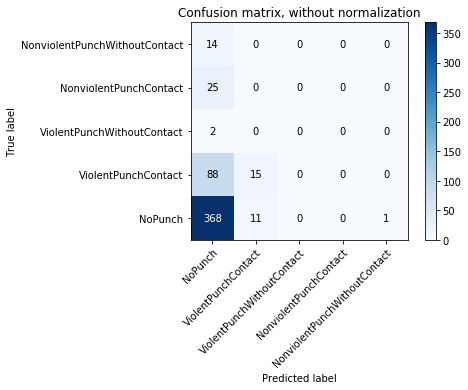

In [15]:
def plot_confusion_matrix(y_true, y_pred, labels,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=labels, yticklabels=labels,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    ax.set_xlim(left=-0.5, right=4.5)
    ax.set_ylim(bottom=-0.5, top=4.5)

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(df['label'], df['predix'], labels=gt_labels.values(),
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
# plot_confusion_matrix(df['class'], df['predix'], labels=gt_labels.values(), normalize=True,
#                       title='Normalized confusion matrix')

plt.show()

In [16]:
samples={}
for truth in range(0,5):
    samples[truth]={}
    for pred in range(0,5):
        if bool(df[(df['label']==truth) & (df['predix']==pred)].shape[0]):
            samples[truth][pred] = df[(df['label']==truth) & (df['predix']==pred)].sample(1)

In [17]:
def fetch_sample(real,predicted):
    truth_target = samples.get(real,None)
    if truth_target:
        pred_target = truth_target.get(predicted,None)
        return pred_target

In [18]:
show = None
c00 = fetch_sample(0,0)
truth,inference = 'NO-PUNCH','same'
if 'DataFrame' in str(type(c00)):
    clip, judge = c00.head(1)['clip_title'].iloc[0],c00.head(1)['labeler'].iloc[0]
    print(f"{truth} clip predicted as {inference} [{clip} brought to you by {judge}]".format())
    show = Video.from_file('/root/vids/' + clip)
show

NO-PUNCH clip predicted as same [streetfight1_slice895_scaled.mp4 brought to you by Ahsen]


FileNotFoundError: [Errno 2] No such file or directory: '/root/vids/streetfight1_slice895_scaled.mp4'

In [11]:
show = None
c01 = fetch_sample(0,1)
truth,inference = 'NO-PUNCH','PUNCH'
if 'DataFrame' in str(type(c01)):
    clip, judge = c01.head(1)['clip_title'].iloc[0],c01.head(1)['labeler'].iloc[0]
    print(f"{truth} clip predicted as {inference} [{clip} brought to you by {judge}]".format())
    show = Video.from_file('/root/vids/' + clip)
show

NO-PUNCH clip predicted as PUNCH [traditional_dance_slice50.mp4 brought to you by Lance]


Video(value=b'\x00\x00\x00 ftypisom\x00\x00\x02\x00isomiso2avc1mp41\x00\x00\x00\x08free\x00\r\x900mdat\x00\x00…

In [12]:
show = None
c10 = fetch_sample(1,0)
truth,inference = 'VIOLENT-PUNCH-CONTACT','no-PUNCH'
if 'DataFrame' in str(type(c10)):
    clip, judge = c10.head(1)['clip_title'].iloc[0],c10.head(1)['labeler'].iloc[0]
    print(f"{truth} clip predicted as {inference} [{clip} brought to you by {judge}]".format())
    show = Video.from_file('/root/vids/' + clip)
show

VIOLENT-PUNCH-CONTACT clip predicted as no-PUNCH [streetfight4_slice30.mp4 brought to you by Ahsen]


Video(value=b'\x00\x00\x00 ftypisom\x00\x00\x02\x00isomiso2avc1mp41\x00\x00\x00\x08free\x00\x0b\x95\x8amdat\x0…

In [13]:
show = None
c11 = fetch_sample(1,1)
truth,inference = 'VIOLENT-PUNCH-CONTACT','PUNCH'
if 'DataFrame' in str(type(c11)):
    clip, judge = c11.head(1)['clip_title'].iloc[0],c11.head(1)['labeler'].iloc[0]
    print(f"{truth} clip predicted as {inference} [{clip} brought to you by {judge}]".format())
    show = Video.from_file('/root/vids/' + clip)
show

VIOLENT-PUNCH-CONTACT clip predicted as PUNCH [V_353.mp4 brought to you by Lance]


Video(value=b'\x00\x00\x00 ftypisom\x00\x00\x02\x00isomiso2avc1mp41\x00\x00\x00\x08free\x00\x07>\xe4mdat\x00\x…

In [14]:
show = None
c20 = fetch_sample(2,0)
truth,inference = 'VIOLENT-PUNCH-without-contact','no-PUNCH'
if 'DataFrame' in str(type(c20)):
    clip, judge = c20.head(1)['clip_title'].iloc[0],c20.head(1)['labeler'].iloc[0]
    print(f"{truth} clip predicted as {inference} [{clip} brought to you by {judge}]".format())
    show = Video.from_file('/root/vids/' + clip)
show

In [15]:
show = None
c21 = fetch_sample(2,1)
truth,inference = 'VIOLENT-PUNCH-without-contact','PUNCH'
if 'DataFrame' in str(type(c21)):
    clip, judge = c21.head(1)['clip_title'].iloc[0],c21.head(1)['labeler'].iloc[0]
    print(f"{truth} clip predicted as {inference} [{clip} brought to you by {judge}]".format())
    show = Video.from_file('/root/vids/' + clip)
show

VIOLENT-PUNCH-without-contact clip predicted as PUNCH [how_to_punch_hard_fast_slice70.mp4 brought to you by Jen]


Video(value=b'\x00\x00\x00 ftypisom\x00\x00\x02\x00isomiso2avc1mp41\x00\x00\x00\x08free\x00\x1dY\xf7mdat\x00\x…

In [16]:
show = None
c30 = fetch_sample(3,0)
truth,inference = 'nonviolent-PUNCH-CONTACT','no-PUNCH'
if 'DataFrame' in str(type(c30)):
    clip, judge = c30.head(1)['clip_title'].iloc[0],c30.head(1)['labeler'].iloc[0]
    print(f"{truth} clip predicted as {inference} [{clip} brought to you by {judge}]".format())
    show = Video.from_file('/root/vids/' + clip)
show

In [17]:
show = None
c31 = fetch_sample(3,1)
truth,inference = 'nonviolent-PUNCH-CONTACT','PUNCH'
if 'DataFrame' in str(type(c31)):
    clip, judge = c31.head(1)['clip_title'].iloc[0],c31.head(1)['labeler'].iloc[0]
    print(f"{truth} clip predicted as {inference} [{clip} brought to you by {judge}]".format())
    show = Video.from_file('/root/vids/' + clip)
show

nonviolent-PUNCH-CONTACT clip predicted as PUNCH [heavy_bag_drills_slice365.mp4 brought to you by Lance]


Video(value=b'\x00\x00\x00 ftypisom\x00\x00\x02\x00isomiso2avc1mp41\x00\x00\x00\x08free\x00\x11\x19\x8cmdat\x0…

In [18]:
show = None
c40 = fetch_sample(4,0)
truth,inference = 'nonviolent-PUNCH-without-contact','no-PUNCH'
if 'DataFrame' in str(type(c40)):
    clip, judge = c40.head(1)['clip_title'].iloc[0],c40.head(1)['labeler'].iloc[0]
    print(f"{truth} clip predicted as {inference} [{clip} brought to you by {judge}]".format())
    show = Video.from_file('/root/vids/' + clip)
show

nonviolent-PUNCH-without-contact clip predicted as no-PUNCH [perfect_hook_punch_slice130.mp4 brought to you by Ahsen]


Video(value=b'\x00\x00\x00 ftypisom\x00\x00\x02\x00isomiso2avc1mp41\x00\x00\x00\x08free\x00\x14m?mdat\x00\x00\…

In [19]:
show = None
c41 = fetch_sample(4,1)
truth,inference = 'nonviolent-PUNCH-without-contact','PUNCH'
if 'DataFrame' in str(type(c41)):
    clip, judge = c41.head(1)['clip_title'].iloc[0],c41.head(1)['labeler'].iloc[0]
    print(f"{truth} clip predicted as {inference} [{clip} brought to you by {judge}]".format())
    show = Video.from_file('/root/vids/' + clip)
show

nonviolent-PUNCH-without-contact clip predicted as PUNCH [how_to_strike_max_power_slice50.mp4 brought to you by Jen]


Video(value=b'\x00\x00\x00 ftypisom\x00\x00\x02\x00isomiso2avc1mp41\x00\x00\x00\x08free\x00\x11\xf7\xa3mdat\x0…